# AirburstSolver User Guide #

In [1]:
# import
import deepimpact

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Running a simulation : ##
### Step 1: Initialize the Planet Object ###

In [2]:
earth = deepimpact.Planet()

### Step 2: Solve Atmospheric Entry ###

Use the solve_atmospheric_entry method to simulate the meteoroid's atmospheric entry. We need to provide several input parameters:

* Meteoroid radius (m)
* Meteoroid velocity (m/s)
* Meteoroid density (kg/m$^3$)
* Meteoroid strength (Pa)
* Meteoroid trajectory angle (degrees)

In [3]:
result = earth.solve_atmospheric_entry(radius=35, angle=45,
                                       strength=1e7, density=3000,
                                       velocity=19e3)
result

,time,velocity,mass,angle,altitude,distance,radius
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000
...,...,...,...,...,...,...,...
218,54.50,85.364855,8.775495e+07,89.129317,88.330817,97236.363343,257.743771
219,54.75,85.246186,8.775476e+07,89.152287,67.006841,97236.683115,257.743771
220,55.00,85.127826,8.775456e+07,89.174636,45.712366,97236.994023,257.743771
221,55.25,85.009775,8.775437e+07,89.196382,24.447321,97237.296319,257.743771


### Step 3: Calculate Energy ###
Calculate the kinetic energy and energy loss during the atmospheric entry.

In [4]:
result = earth.calculate_energy(result)

result

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,-1.259594
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
...,...,...,...,...,...,...,...,...
218,54.50,85.364855,8.775495e+07,89.129317,88.330817,97236.363343,257.743771,0.009991
219,54.75,85.246186,8.775476e+07,89.152287,67.006841,97236.683115,257.743771,0.009965
220,55.00,85.127826,8.775456e+07,89.174636,45.712366,97236.994023,257.743771,0.009939
221,55.25,85.009775,8.775437e+07,89.196382,24.447321,97237.296319,257.743771,0.009913


### Step 4: Analyze the Outcome ###
Determine whether the event results in an airburst or a cratering event and analyze other outcome metrics.

In [5]:
outcome = earth.analyse_outcome(result)

outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 2751.737626376074,
 'burst_altitude': 10662.567111342949,
 'burst_distance': 89603.06658316519,
 'burst_energy': 17634.759935367347}

## Interactive Simulation: ##

1. Adjust the input parameters using the provided sliders.
2. Click the 'Run Simulation' button to start the simulation.
3. The simulation will process the inputs and display the results in a series of graphs and data tables.

*** If the button does not display, restart and run the notebook again. ***

In [6]:
import ipywidgets as widgets
from ipywidgets import interactive

# Function to display the current value of the slider
def display_current_value(value):
    print(f"Current Value: {value}")

default_radius = 35.
default_velocity = 19e3
default_density = 3000
default_strength = 1e7
default_angle = 45.
default_timetep = 0.25

# Creating widgets for each input; change the min/max (etc) parameter when necessary
# Notes: The default value is set to the input of tests/scenario.npz
radius_widget = widgets.FloatSlider(value=default_radius, min=0.1, max=1000, step=0.1, description='Radius (m):')
velocity_widget = widgets.FloatSlider(value=default_velocity, min=1000, max=10e6, step=1000, description='Velocity (m/s):')
density_widget = widgets.FloatSlider(value=default_density, min=500, max=8000, step=100, description='Density (kg/m^3):')
strength_widget = widgets.FloatSlider(value=default_strength, min=1e5, max=1e9, step=1e6, description='Strength (Pa):')
angle_widget = widgets.FloatSlider(value=default_angle, min=0, max=360, step=1, description='Angle (degrees):')
timestep_widget = widgets.FloatSlider(value=default_timetep, min=0.01, max=1, step=0.01, description='Timestep (s):')

# Linking each widget to the display function
interactive_radius = interactive(display_current_value, value=radius_widget)
interactive_velocity = interactive(display_current_value, value=velocity_widget)
interactive_density = interactive(display_current_value, value=density_widget)
interactive_strength = interactive(display_current_value, value=strength_widget)
interactive_angle = interactive(display_current_value, value=angle_widget)
interactive_timestep = interactive(display_current_value, value=timestep_widget)

# Displaying the widgets
display(interactive_radius,interactive_velocity, 
        interactive_density, interactive_strength, 
        interactive_angle, interactive_timestep)


interactive(children=(FloatSlider(value=35.0, description='Radius (m):', max=1000.0, min=0.1), Output()), _dom…

interactive(children=(FloatSlider(value=19000.0, description='Velocity (m/s):', max=10000000.0, min=1000.0, st…

interactive(children=(FloatSlider(value=3000.0, description='Density (kg/m^3):', max=8000.0, min=500.0, step=1…

interactive(children=(FloatSlider(value=10000000.0, description='Strength (Pa):', max=1000000000.0, min=100000…

interactive(children=(FloatSlider(value=45.0, description='Angle (degrees):', max=360.0, step=1.0), Output()),…

interactive(children=(FloatSlider(value=0.25, description='Timestep (s):', max=1.0, min=0.01, step=0.01), Outp…

In [7]:
import matplotlib.pyplot as plt

# Data visualization
def display_results(result_df, outcome):
    # Display the dataframe and outcome dictionary
    display(result_df)
    display(outcome)

    # Setting up the figure for subplots
    fig, axs = plt.subplots(10, 1, figsize=(10, 20))  # 10 rows, 1 column

    # Plotting each feature in a separate subplot
    axs[0].plot(result_df['altitude'], result_df['mass'], label='Mass', color='blue')
    axs[0].set_title('Mass vs Altitude')
    axs[0].set_xlabel('Altitude (m)')
    axs[0].set_ylabel('Mass (kg)')

    axs[1].plot(result_df['altitude'], result_df['velocity'], label='Velocity', color='green')
    axs[1].set_title('Velocity vs Altitude')
    axs[1].set_xlabel('Altitude (m)')
    axs[1].set_ylabel('Velocity (m/s)')

    axs[2].plot(result_df['altitude'], result_df['angle'], label='Angle', color='red')
    axs[2].set_title('Angle vs Altitude')
    axs[2].set_xlabel('Altitude (m)')
    axs[2].set_ylabel('Angle (degrees)')

    axs[3].plot(result_df['altitude'], result_df['distance'], label='Distance', color='purple')
    axs[3].set_title('Distance vs Altitude')
    axs[3].set_xlabel('Altitude (m)')
    axs[3].set_ylabel('Distance (m)')

    axs[4].plot(result_df['altitude'], result_df['radius'], label='Radius', color='orange')
    axs[4].set_title('Radius vs Altitude')
    axs[4].set_xlabel('Altitude (m)')
    axs[4].set_ylabel('Radius (m)')

    axs[5].plot(result_df['time'], result_df['mass'], label='Mass', color='blue')
    axs[5].set_title('Mass vs Time')
    axs[5].set_xlabel('Time (s)')
    axs[5].set_ylabel('Mass (kg)')

    axs[6].plot(result_df['time'], result_df['velocity'], label='Velocity', color='green')
    axs[6].set_title('Velocity vs Time')
    axs[6].set_xlabel('Time (s)')
    axs[6].set_ylabel('Velocity (m/s)')

    axs[7].plot(result_df['time'], result_df['angle'], label='Angle', color='red')
    axs[7].set_title('Angle vs Time')
    axs[7].set_xlabel('Time (s)')
    axs[7].set_ylabel('Angle (degrees)')

    axs[8].plot(result_df['time'], result_df['distance'], label='Distance', color='purple')
    axs[8].set_title('Distance vs Time')
    axs[8].set_xlabel('Time (s)')
    axs[8].set_ylabel('Distance (m)')

    axs[9].plot(result_df['time'], result_df['radius'], label='Radius', color='orange')
    axs[9].set_title('Radius vs Time')
    axs[9].set_xlabel('Time (s)')
    axs[9].set_ylabel('Radius (m)')

    
    # Adjusting layout for better visibility
    plt.tight_layout()
    plt.show()



### Clike on the 'Run Simulation' button to display the results: ###

Button(description='Run Simulation', style=ButtonStyle())

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,-1.259594
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
...,...,...,...,...,...,...,...,...
218,54.50,85.364855,8.775495e+07,89.129317,88.330817,97236.363343,257.743771,0.009991
219,54.75,85.246186,8.775476e+07,89.152287,67.006841,97236.683115,257.743771,0.009965
220,55.00,85.127826,8.775456e+07,89.174636,45.712366,97236.994023,257.743771,0.009939
221,55.25,85.009775,8.775437e+07,89.196382,24.447321,97237.296319,257.743771,0.009913


{'outcome': 'Airburst',
 'burst_peak_dedz': 2751.737626376074,
 'burst_altitude': 10662.567111342949,
 'burst_distance': 89603.06658316519,
 'burst_energy': 17634.759935367347}

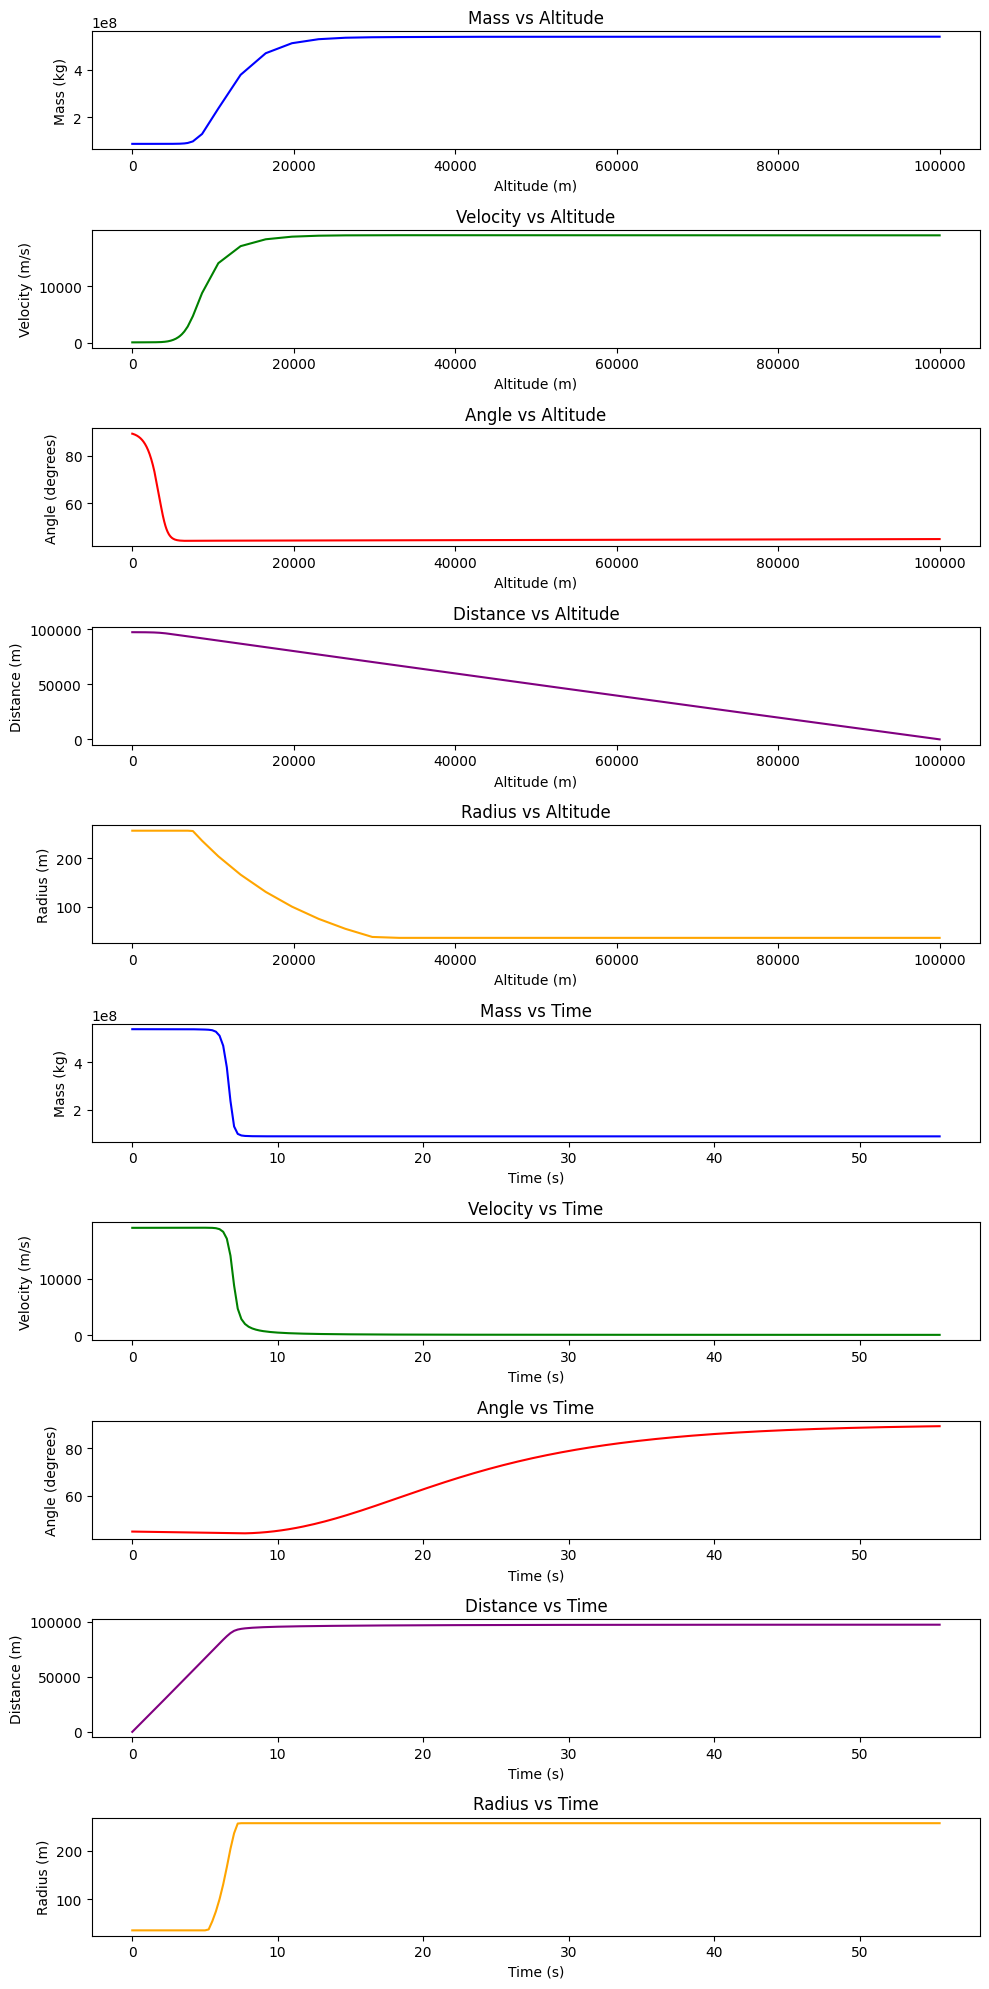

In [ ]:
# Function to run on button click
def run_simulation(b):
    earth = deepimpact.Planet()
    # Getting values from widgets
    radius = radius_widget.value
    velocity = velocity_widget.value
    density = density_widget.value
    strength = strength_widget.value
    angle = angle_widget.value
    timestep = timestep_widget.value
    
    # Running the solver
    result_df = earth.solve_atmospheric_entry(radius, velocity, density, strength, angle, dt=timestep)
    result_df = earth.calculate_energy(result_df)
    outcome = earth.analyse_outcome(result_df)
    
    # Display results and plots
    display_results(result_df, outcome)

run_button = widgets.Button(description='Run Simulation')
run_button.on_click(run_simulation)
display(run_button)


### Understanding the Output ###

The output consists of:

* A Pandas dataframe: Shows various parameters like altitude, velocity, mass, etc., at each timestep.
* Graphs/Plots: Visual representations of the meteoroid’s mass, velocity, angle, distance, and radius over altitude (m).

### Now we use the defalut setting simulation to compare with the tests/scenario.npz

In [9]:
# Use the default value to compare the simulation with the tests/scenario.npz
def display_energy(result_df, scenario_df_energy):
    print("The result of our simulation is: ")
    display(result_df[:40])
    print("The result of the example scenario is: ")
    display(scenario_df_energy)
    
    altitude_km = result_df['altitude']/1000
    sce_altitude = scenario_df_energy['altitude']/1000
    plt.plot(result_df['dedz'], altitude_km, label='Simulation', color='blue')
    # Plot the scenario data
    plt.plot(scenario_df_energy['dedz'], sce_altitude, label='Scenario', color='red', linestyle='--')
    plt.xlabel('Energy Deposition Rate (kt/km)')
    plt.ylabel('Altitude (km)')
    plt.title('Energy Deposition Rate Comparison')
    plt.legend()
    plt.grid(True)

    # Adjusting layout for better visibility
    plt.tight_layout()
    plt.show()

Button(description='Compare Energy', style=ButtonStyle())

The result of our simulation is: 


,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.00,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,-1.259594
2,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
3,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
4,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
5,1.25,19008.637025,5.387806e+08,44.877087,83220.405805,16577.252729,35.000000,-1.243590
6,1.50,19010.352507,5.387791e+08,44.852416,79867.911694,19903.043870,35.000000,-1.233329
7,1.75,19012.059639,5.387769e+08,44.827717,76516.567381,23232.289847,35.000000,-1.217721
8,2.00,19013.754466,5.387734e+08,44.802988,73166.377269,26564.993205,35.000000,-1.193983
9,2.25,19015.430979,5.387681e+08,44.778229,69817.346632,29901.155625,35.000000,-1.157885


The result of the example scenario is: 


,velocity,mass,angle,altitude,distance,radius,dedz
0,19000.000000,5.387831e+08,45.000000,100000.000000,0.000000,35.000000,0.000000
1,19001.732002,5.387830e+08,44.975476,96641.808512,3308.569407,35.000000,-1.259563
2,19003.462232,5.387827e+08,44.950922,93284.750417,6620.575395,35.000000,-1.257459
3,19005.190418,5.387822e+08,44.926340,89928.828537,9936.022056,35.000000,-1.254792
4,19006.915834,5.387816e+08,44.901728,86574.045891,13254.913299,35.000000,-1.250645
5,19008.637187,5.387806e+08,44.877087,83220.405751,16577.252782,35.000000,-1.243840
6,19010.352604,5.387791e+08,44.852416,79867.911648,19903.043916,35.000000,-1.233196
7,19012.059605,5.387769e+08,44.827717,76516.567383,23232.289844,35.000000,-1.217452
8,19013.753849,5.387733e+08,44.802988,73166.377565,26564.992906,35.000000,-1.192787
9,19015.430559,5.387681e+08,44.778229,69817.346890,29901.155365,35.000000,-1.158290


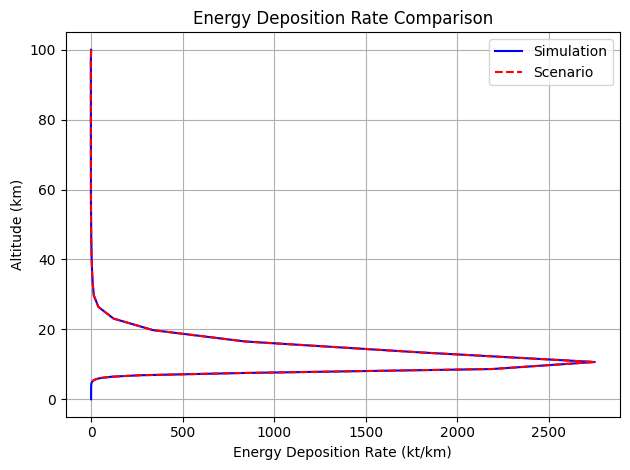

In [ ]:
# Function to run on button click
def compare_energy(b):
    earth = deepimpact.Planet()
    # Using default values from tests/scenario.npz for comparison
    radius = default_radius
    velocity = default_velocity
    density = default_density
    strength = default_strength
    angle = default_angle
    timestep = default_timetep
    
    # Load your scenario data
    data = np.load('tests/scenario.npz')
    # data is now a Numpy object that works like a dictionary. You can list all the contained variables using:

    scenario_df = pd.DataFrame({
        'velocity': data['velocity'],
        'mass': data['mass'],
        'angle': data['angle'],
        'altitude': data['altitude'],
        'distance': data['distance'],
        'radius': data['radius']
    })

    scenario_df_energy = earth.calculate_energy(scenario_df)

    # Running the solver
    result_df = earth.solve_atmospheric_entry(radius, velocity, density, strength, angle, dt=timestep)
    result_df = earth.calculate_energy(result_df)
    outcome = earth.analyse_outcome(result_df)
    
    # Display results and plots
    display_energy(result_df, scenario_df_energy)

run_button = widgets.Button(description='Compare Energy')
run_button.on_click(compare_energy)
display(run_button)

### Observations from the comparsion:
As shown in the graph:
1. The radius of our simulation and the example scenarios starts to chanege at a similiar time, indicating the airblast happens at the same time in our simulation and the example scenario.
2. The differences between the velocity, mass, angle, altitude, distance and radius of our simulation compared with those of the example scenario is relatively small.
3. The close overlap of the two lines indicates that the simulation closely replicates the scenario, which suggests that the model used for the simulation is accurately representing the real-world situation. 